In [1]:
import time
start = time.time()

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import hstack, csr_matrix
from sklearn.pipeline import FeatureUnion

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install eli5
import eli5
# models
from sklearn import feature_selection
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import nltk
from nltk.classify import Senna
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn import preprocessing
from scipy.sparse import hstack, csr_matrix
import scipy.stats as st

import matplotlib.pyplot as plt
import seaborn as sns


Using TensorFlow backend.


In [3]:
!pip install chart_studio
import chart_studio.plotly as py

import gc

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [4]:
#import packages
import os
import re
import sys
import csv
import pickle
import numpy as np
from time import ctime, time
from collections import defaultdict
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
from nltk.tokenize import RegexpTokenizer,sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

import seaborn as sns
import matplotlib.pyplot as plt
import pyLDAvis
import pyLDAvis.gensim

import spacy
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

In [5]:
train_data = pd.read_csv(r'C:\Users\liewm\Documents\BT4240 Machine Learning\Project\donorsnlp1.csv')
train_data=train_data.drop(columns=['Unnamed: 0'])
train_data.head(2)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,res_cat_Classroom Basics,res_cat_Educational Kits & Games,res_cat_Sports & Exercise Equipment,res_cat_Musical Instruments,res_cat_Art Supplies,res_cat_Lab Equipment,res_cat_Visitors,Combined Project Essay,essay_processed,need_processed
0,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Counter({'Music & The Arts': 1, 'Health & Sports': 1})","Counter({'Performing Arts': 1, 'Team Sports': 1})",Keep Calm and Dance On,"Our elementary school is a culturally rich school, with a diverse population of 580 students, in Pre-K through sixth grade.\r\nOur Title I school population has 92% of students qualifying for free...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Our elementary school is a culturally rich school, with a diverse population of 580 students, in Pre-K through sixth grade.\r\nOur Title I school population has 92% of students qualifying for free...",elementary school rich school diverse population student pre - k sixth title school population % student qualify free reduce price lunch high concentration english learner serve foster group home ...,student need matching shirt wear dance performance competition
1,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Counter({'Applied Learning': 1, 'Literacy & Language': 1})","Counter({'Character Education': 1, 'Literature & Writing': 1})",Need to Reach Our Virtual Mentors!!!,"My kids tell me each day that they want to make me one happy teacher. And they do! They are Respectful, On-Task, Accountable, Responsible & Safe. These are our school's core values. \r\n\r\nTh...",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"My kids tell me each day that they want to make me one happy teacher. And they do! They are Respectful, On-Task, Accountable, Responsible & Safe. These are our school's core values. \r\n\r\nTh...",kid tell day want make happy teacher respectful task accountable responsible safe school core value \r\n\r\nthese first grader amaze determination improvement watch make half school year worth lea...,student need tablet order communicate virtual mentor program start call telementore student exchange message share online folder video chat read digital book


In [6]:
train_data.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'description', 'total_cost', 'Project Resource Category',
       'Project Need Statement', 'proj_cat_Music & The Arts',
       'proj_cat_Health & Sports', 'proj_cat_Applied Learning',
       'proj_cat_Literacy & Language', 'proj_cat_Math & Science',
       'proj_cat_Special Needs', 'proj_cat_History & Civics',
       'proj_cat_Warmth', 'proj_cat_Care & Hunger',
       'proj_sub_cat_Performing Arts', 'proj_sub_cat_Team Sports',
       'proj_sub_cat_Character Education', 'proj_sub_cat_Literature & Writing',
       'proj_sub_cat_Mathematics', 'proj_sub_cat_Literacy',
       'proj_su

In [7]:
#drop numeric columns 
df=train_data.drop(columns=['teacher_id','teacher_prefix','school_state', 'project_subject_categories', 'project_subject_subcategories','teacher_number_of_previously_posted_projects', 'total_cost' ,'Project Need Statement'])
df.columns

Index(['id', 'project_submitted_datetime', 'project_grade_category',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'project_is_approved', 'description', 'Project Resource Category',
       'proj_cat_Music & The Arts', 'proj_cat_Health & Sports',
       'proj_cat_Applied Learning', 'proj_cat_Literacy & Language',
       'proj_cat_Math & Science', 'proj_cat_Special Needs',
       'proj_cat_History & Civics', 'proj_cat_Warmth',
       'proj_cat_Care & Hunger', 'proj_sub_cat_Performing Arts',
       'proj_sub_cat_Team Sports', 'proj_sub_cat_Character Education',
       'proj_sub_cat_Literature & Writing', 'proj_sub_cat_Mathematics',
       'proj_sub_cat_Literacy', 'proj_sub_cat_Early Development',
       'proj_sub_cat_Environmental Science', 'proj_sub_cat_Health & Wellness',
       'proj_sub_cat_Music', 'proj_sub_cat_Applied Sciences',
       'proj_sub_cat_Visual Arts', 'proj_sub_cat_ESL',
     

In [13]:
import numpy as np
df['essay_processed']=df['essay_processed'].replace(np.nan, '', regex=True)

In [14]:
df_0=df[df['project_is_approved']==0]
df_1=df[df['project_is_approved']==1]

In [15]:
df_0['project_is_approved'].value_counts()

0.0    8830
Name: project_is_approved, dtype: int64

In [16]:
# function to plot most frequent terms
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df_0['essay_processed']]

def freq_words(x, terms = 20):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

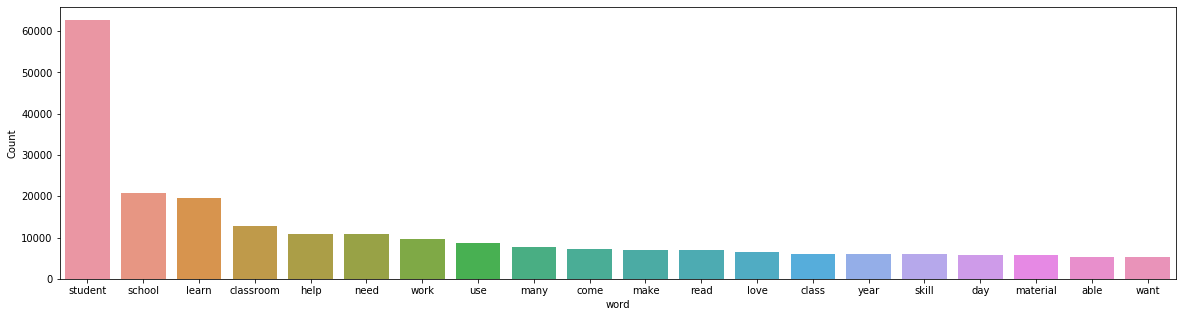

In [17]:
freq_words(reviews)

In [18]:
# function to plot most frequent terms
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in df_1['essay_processed']]

def freq_words(x, terms = 20):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

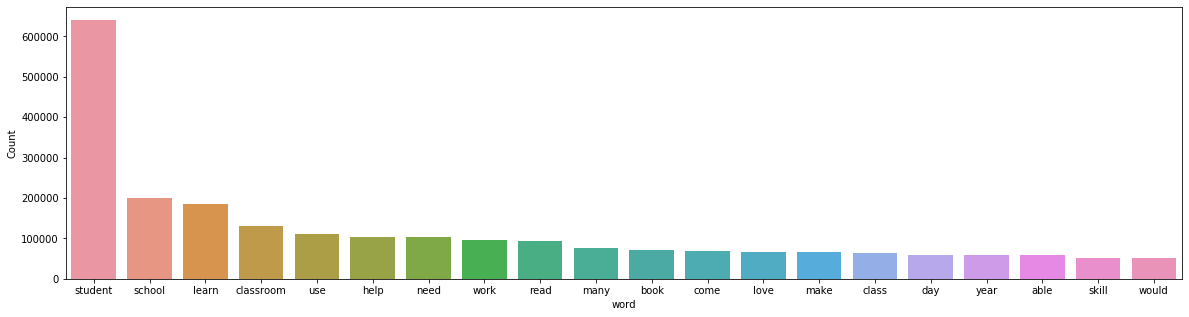

In [19]:
freq_words(reviews)

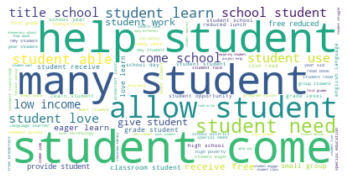

In [6]:
def genWordCloud(col_name):
    df[col_name]=df[col_name].fillna('')
    text_essay=" ".join(str(essay) for essay in df[col_name])
    #using the stopwords available in python 
    stopwords = set(STOPWORDS)
    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_essay)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    fig=plt.show()
    return fig

wordcloud=genWordCloud('essay_processed')
wordcloud